In [1]:
from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# Loading image to predict
img_path = 'images/rose01.jpeg'

img = load_img(img_path)

In [14]:
# resize image to 224x224 square shape
img = img.resize((224,224))

In [15]:
# Convert the image to array 
img_array = img_to_array(img)

In [16]:
# Convert the image into a 4 dimensional Tensor
# Convert from (height, width, channels) to (batchsize, height, width, channel)
img_array = np.expand_dims(img_array, axis=0) 

In [17]:
# Preprocess the input image array
img_array = imagenet_utils.preprocess_input(img_array)

In [7]:
# Load the model from internet/computer
pretrained_model = VGG19(weights="imagenet")

574717952/574710816 [==============================] - 1093s 2us/step


In [18]:
# Predict using predict method
prediction = pretrained_model.predict(img_array)

In [19]:
# Decode the prediction
actual_prediction = imagenet_utils.decode_predictions(prediction)

In [20]:
print(actual_prediction)

[[('n03476684', 'hair_slide', 0.22689325), ('n04522168', 'vase', 0.14792624), ('n03814906', 'necklace', 0.045096155), ('n04599235', 'wool', 0.042365517), ('n04584207', 'wig', 0.04210379)]]


In [21]:
print(f"Predicted object is [{actual_prediction[0][0][1]}] with accuracy of [{np.round(actual_prediction[0][0][2]*100,2)}%].")

Predicted object is [hair_slide] with accuracy of [22.69%].


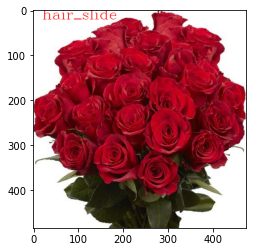

In [22]:
# Read the loaded image
disp_img = cv2.imread(img_path)
disp_img = cv2.cvtColor(disp_img, cv2.COLOR_BGR2RGB)

# display predicted text over the image
cv2.putText(disp_img, actual_prediction[0][0][1], (20,20), cv2.FONT_HERSHEY_COMPLEX, 1, (255,0,0))

# Show the image
plt.imshow(disp_img)
#cv2.imshow("Prediction", disp_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()